# Part I

Nelow is some supplementary code to question 1. Note that perturbing one single point only allows the adversary to choose one of the parameters. It is possible to influence both the intercept and slope estimates by controling two points.

My main takeway is that data is easy to corrupt, and thus speaks to the importance of preprocessing and data cleaning to reduce the influence of potential noise.

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
def generate_data(n, w1, w2, x_range=(0, 10)):
    """
    Generates n observations based on a linear model y = w1*x + w2.

    Parameters:
    - n (int): Number of observations.
    - w1, w2 (float): Coefficients of the linear model.
    - x_range (tuple): The range (min, max) of x values.

    Returns:
    - observations (ndarray): Generated x values.
    - y_true (ndarray): The corresponding y values without noise.
    """
    observations = np.linspace(x_range[0], x_range[1], n)
    y_true = w1 * observations + w2
    return observations, y_true

def perturb_observations(y_true, indices, noises):
    """
    Perturbs multiple observations by adding different noises to them.
    """
    y_perturbed = np.copy(y_true)
    y_perturbed[indices] += noises

    return y_perturbed

def fit_and_plot(observations, y_true, y_perturbed):
    """
    Fits linear regression models to both true and perturbed data, and plots them.

    Parameters:
    - observations (ndarray): x values of observations.
    - y_true (ndarray): True y values.
    - y_perturbed (ndarray): Perturbed y values.
    """
    # Fit linear regression to the true data
    reg_true = LinearRegression().fit(observations.reshape(-1, 1), y_true)

    # Fit linear regression to the perturbed data
    reg_perturbed = LinearRegression().fit(observations.reshape(-1, 1), y_perturbed)

    # Plotting
    plt.figure(figsize=(5, 4))
    plt.plot(observations, y_true, "o", label="True Data")
    plt.plot(observations, y_perturbed, "x", label="Perturbed Data")
    plt.plot(observations, reg_true.predict(observations.reshape(-1, 1)), "r-", label="True Model")
    plt.plot(observations, reg_perturbed.predict(observations.reshape(-1, 1)), "--y", label="Perturbed Model")
    plt.legend()
    plt.show()

    # Print the estimates for the perturbed model
    print("Estimated w2:", reg_true.intercept_)
    print("Estimated w1:", reg_true.coef_[0])
    print("------------------------------")
    print("Estimated w2 (with noise):", reg_perturbed.intercept_)
    print("Estimated w1 (with noise):", reg_perturbed.coef_[0])


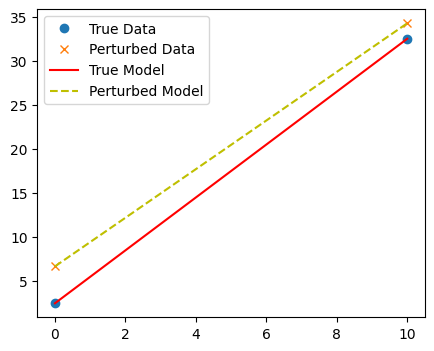

Estimated w2: 2.5
Estimated w1: 3.0
------------------------------
Estimated w2 (with noise): 6.683674603619533
Estimated w1 (with noise): 2.757014843423756


In [ ]:
observations, y_true = generate_data(2, w1=3, w2=2.5)
y_perturbed = perturb_observations(y_true, [0,1], 2)
fit_and_plot(observations, y_true, y_perturbed)

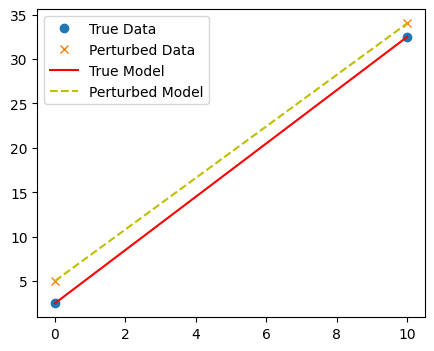

Estimated w2: 2.5
Estimated w1: 3.0
------------------------------
Estimated w2 (with noise): 5.01135771367661
Estimated w1 (with noise): 2.901115452456535


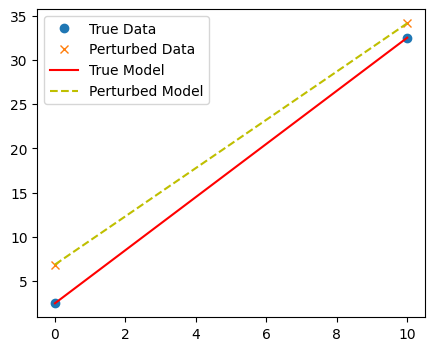

Estimated w2: 2.5
Estimated w1: 3.0
------------------------------
Estimated w2 (with noise): 6.873824641968051
Estimated w1 (with noise): 2.7253152617610876


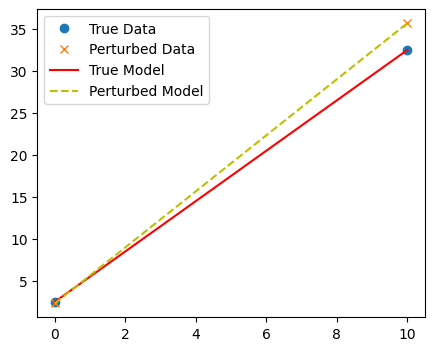

Estimated w2: 2.5
Estimated w1: 3.0
------------------------------
Estimated w2 (with noise): 2.312916711117719
Estimated w1 (with noise): 3.337918223931476


In [ ]:
noises = [1.5, 3, 2]

for noise in noises:

    observations, y_true = generate_data(2, w1=3, w2=2.5)
    y_perturbed = perturb_observations(y_true, [0,1], noise)
    fit_and_plot(observations, y_true, y_perturbed)

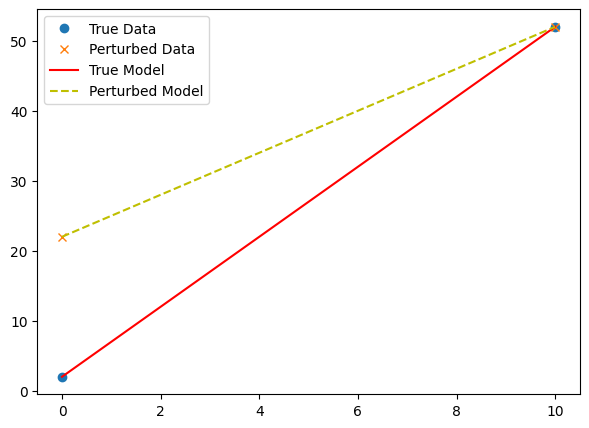

Estimated w2: 2.0
Estimated w1: 5.0
------------------------------
Estimated w2 (with noise): 22.0
Estimated w1 (with noise): 3.0


In [ ]:
n = 2
w1 = 5
w2 = 2
indices = [0]  # Indices of observations to be perturbed
noises = [20]  # Corresponding noises
observations, y_true = generate_data(n, w1, w2)
y_perturbed = perturb_observations(y_true, indices, noises)
fit_and_plot(observations, y_true, y_perturbed)

# note that once we change one point the estimate of both parameters changes simultaneously as shown in the written work.
# this means that it is not possible to make any corrections if needed to get w*

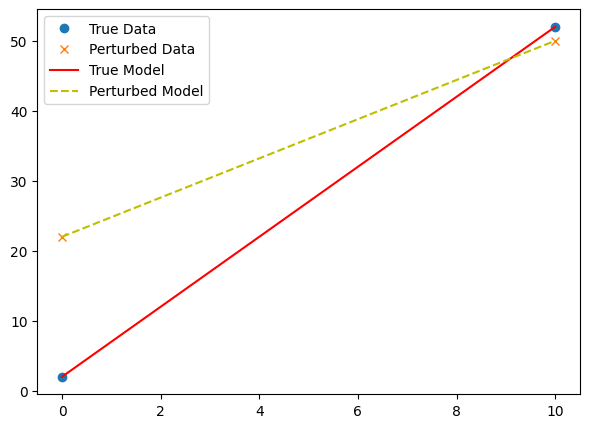

Estimated w2: 2.0
Estimated w1: 5.0
------------------------------
Estimated w2 (with noise): 22.000000000000004
Estimated w1 (with noise): 2.7999999999999994


In [ ]:
indices = [0, 1]  # Indices of observations to be perturbed
noises = [20, -2]  # Corresponding noises
observations, y_true = generate_data(n, w1, w2)
y_perturbed = perturb_observations(y_true, indices, noises)
fit_and_plot(observations, y_true, y_perturbed)

# trivially, if n=2, eltering two observations is altering the entire trianing data and thus the adversary can induce any w*

In [ ]:
def induce_desired_model(w1_star, w2_star, x, y, case):
    """
    Adjusts observations to fit a desired linear model with slope w1* and intercept w2*.
    Tests the ability to induce a specific model by changing one or both observation points.

    Parameters:
    - w1_star (float): Desired slope.
    - w2_star (float): Desired intercept.
    - x (numpy array): x values of the observations.
    - y (numpy array): Original y values of the observations.
    - case (int): 1 for changing one point, 2 for changing two points.

    Outputs:
    - Prints the comparison of desired and estimated coefficients.
    """
    reg = LinearRegression()
    if case == 1:
        # Calculate the necessary noise for one point to change the intercept
        n1 = w2_star - (y[0] - w1_star * x[0])
        y_adjusted = np.copy(y)
        y_adjusted[0] += n1
    elif case == 2:
        # Calculate the necessary noise for both points to match both w1* and w2*
        n1 = w2_star - (y[0] - w1_star * x[0])
        n2 = (w1_star * x[1] + w2_star) - y[1]
        y_adjusted = np.copy(y)
        y_adjusted[0] += n1
        y_adjusted[1] += n2
    else:
        raise ValueError("Case must be either 1 or 2.")

    # Fit the model to the adjusted observations
    reg.fit(x.reshape(-1, 1), y_adjusted)
    w1_hat = reg.coef_[0]
    w2_hat = reg.intercept_

    # Print results
    print(f"Case {case}:")
    print(f"Desired slope (w1*): {w1_star}, Estimated slope (w1_hat): {w1_hat}")
    print(f"Desired intercept (w2*): {w2_star}, Estimated intercept (w2_hat): {w2_hat}\n")

# Example usage
x = np.array([0, 1])  # x values of the observations
y = np.array([2, 5])  # Original y values of the observations
w1_star = 3  # Desired slope
w2_star = 7  # Desired intercept

# Test both cases
induce_desired_model(w1_star, w2_star, x, y, 1) # only one parameter succesfully induced
induce_desired_model(w1_star, w2_star, x, y, 2) # both parameters succesfully induced

Case 1:
Desired slope (w1*): 3, Estimated slope (w1_hat): -1.9999999999999996
Desired intercept (w2*): 7, Estimated intercept (w2_hat): 7.0

Case 2:
Desired slope (w1*): 3, Estimated slope (w1_hat): 2.9999999999999996
Desired intercept (w2*): 7, Estimated intercept (w2_hat): 7.0



In [ ]:
x = np.array([0, 1, 3, 6])  # x values of the observations
y = np.array([2, 5, 2, 4])  # Original y values of the observations
w1_star = 3  # Desired slope
w2_star = 7  # Desired intercept

# Test both cases
induce_desired_model(w1_star, w2_star, x, y, 1) # not one parameter succesfully induced
induce_desired_model(w1_star, w2_star, x, y, 2) # not one parameter succesfully induced

Case 1:
Desired slope (w1*): 3, Estimated slope (w1_hat): -0.4761904761904763
Desired intercept (w2*): 7, Estimated intercept (w2_hat): 5.690476190476191

Case 2:
Desired slope (w1*): 3, Estimated slope (w1_hat): -0.8333333333333334
Desired intercept (w2*): 7, Estimated intercept (w2_hat): 7.833333333333334



## Problem 3

Complete the exercise 1 after the Chapter 3 adding different level and different type of noise to training data
and  the  excercise 4 reducing the size of training data (you study how your accuracy depends on noise and
size of training dataset )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

### MNIST

I start by loading the MNIST dataset as described in the book

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [ ]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 1. An MNIST Classifier With Over 97% Accuracy

Exercise: _Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weights` and `n_neighbors` hyperparameters)._

The baseline classifier performs fairly well

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

Some hyperparameter tuning takes it just above 97%

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

### With noise

Now, let's introduce noise to the training examples and study the effects of accuracy.

In [ ]:
def add_noise(X_train, X_test, noise_train, noise_test):
    X_train_noise = X_train + noise_train
    X_test_noise = X_test + noise_test

    plt.figure(figsize=(7, 7))
    for idx, image_data in enumerate(X_train_noise[:100]):
        plt.subplot(10, 10, idx + 1)
        plot_digit(image_data)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    return X_train_noise, X_test_noise

def fit_score(X_train_noise, X_test_noise, y_train):
    noise_model = KNeighborsClassifier()
    noise_model.fit(X_train_noise, y_train)

    pred = noise_model.predict(X_test_noise)
    # Calculate precision metrics from the confusion matrix
    precision = precision_score(y_test, pred, average="macro")

    # Print the precision metrics
    print(f"Macro Averaged Precision: {precision}")

    # Plot the confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

The level of noise has a significant impact on the classifiers performance. An almost opaque set of figures yields a mere 37%. Other experiments for different tytpes of noise did not seem to hurt much, achieving accuracy scores of 89%, 97% and 97%

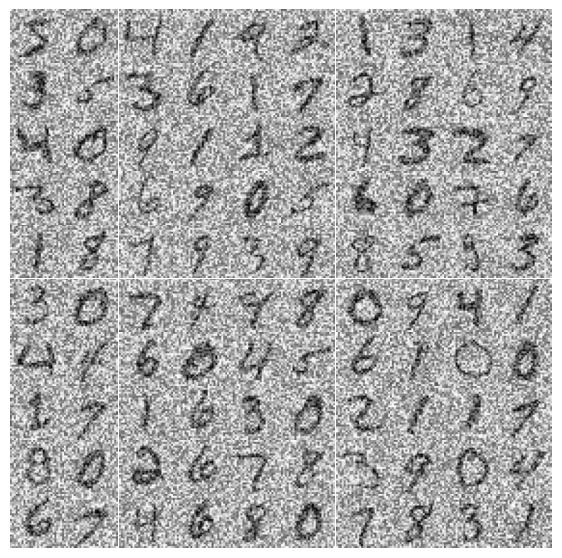

Macro Averaged Precision: 0.8869532462269415


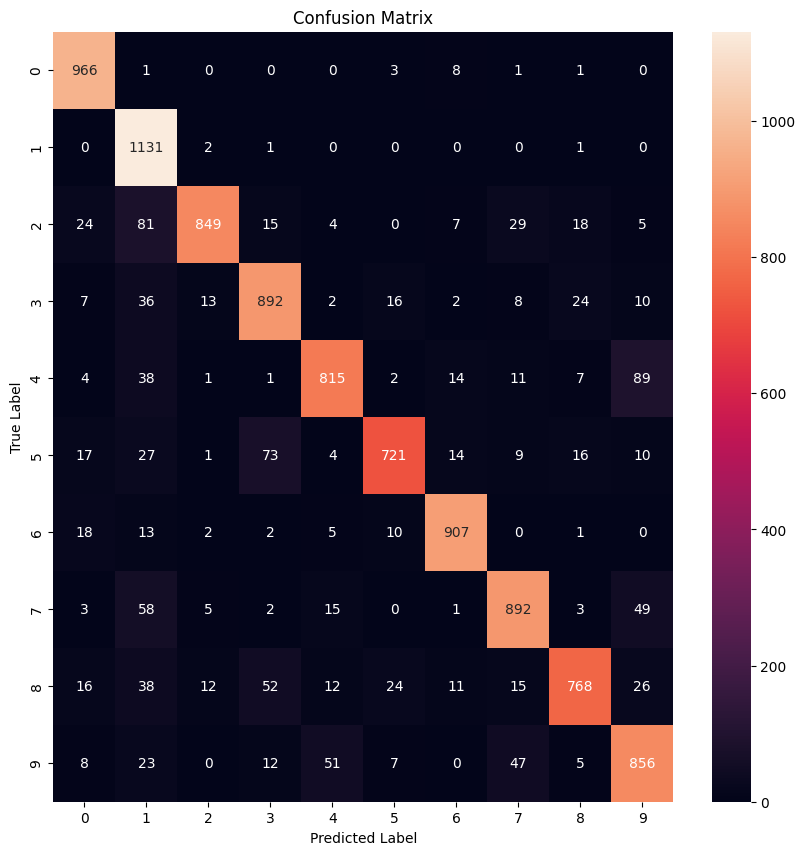

In [ ]:
n1 = np.random.randint(100, 520, size=(X_train.shape[0], 28*28))
n2 = np.random.randint(100, 550, size=(X_test.shape[0], 28*28))

X_train_noise, X_test_noise = add_noise(X_train, X_test, n1, n2)

fit_score(X_train_noise, X_test_noise, y_train)

#plot_digit(X_train_noise[5])

In [ ]:
# some chatgpt generated alternative choices of noise

# 1. Gaussian noise with different variances:
n3 = np.random.normal(0, 500, size=(X_train.shape[0], 28*28))
n4 = np.random.normal(0, 100, size=(X_test.shape[0], 28*28))

# Rationale: Gaussian noise is a common type of noise that can occur in images due to sensor noise or transmission errors.
# Higher variance noise is expected to have a greater impact on the classifier's performance compared to lower variance noise.

# 2. Salt and pepper noise:
n5 = np.random.choice([-10, 0, 10], size=(X_train.shape[0], 28*28))
n6 = np.random.choice([-10, 0, 10], size=(X_test.shape[0], 28*28))

# Rationale: Salt and pepper noise is characterized by randomly occurring black and white pixels in an image.
# This type of noise can be particularly challenging for classifiers as it can introduce spurious features or occlude important ones.

# 3. Speckle noise:
n7 = np.random.poisson(50, size=(X_train.shape[0], 28*28)) - 5
n8 = np.random.poisson(50, size=(X_test.shape[0], 28*28)) - 5

# Rationale: Speckle noise is a multiplicative noise that often occurs in images acquired using coherent imaging systems.
# This type of noise can result in bright spots or streaks in the image, which can confuse the classifier.


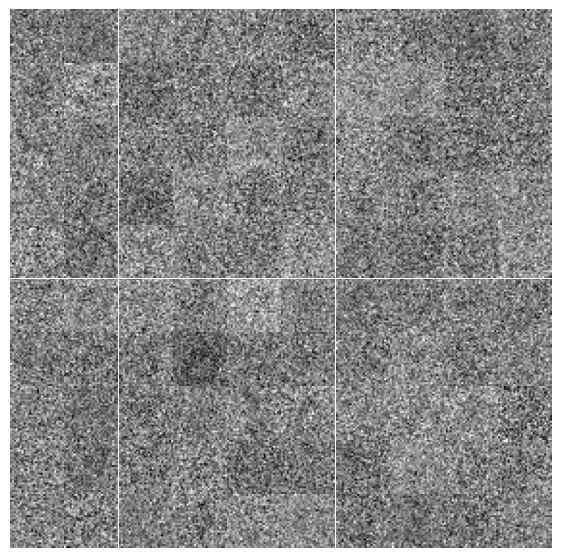

Macro Averaged Precision: 0.36708688395366845


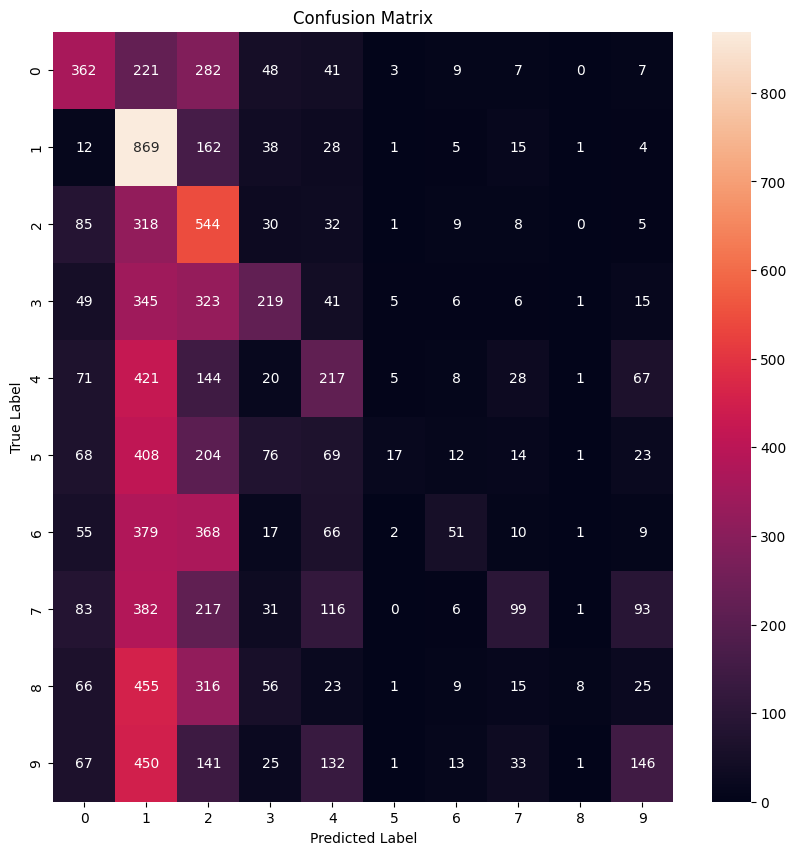

In [ ]:
X_train_noise, X_test_noise = add_noise(X_train, X_test, n3, n4)

fit_score(X_train_noise, X_test_noise, y_train)

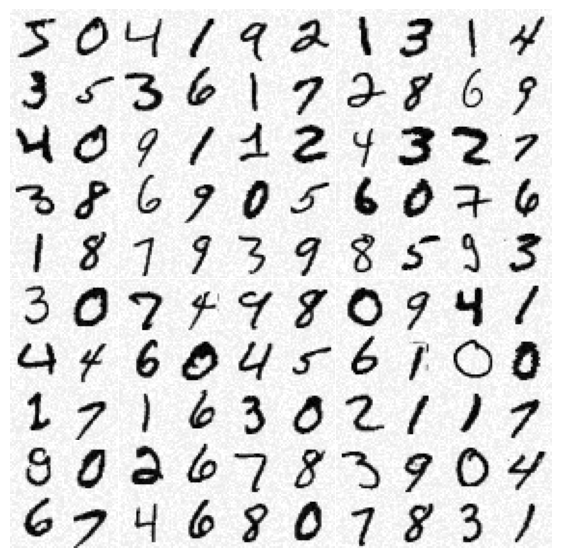

Macro Averaged Precision: 0.9693606062951498


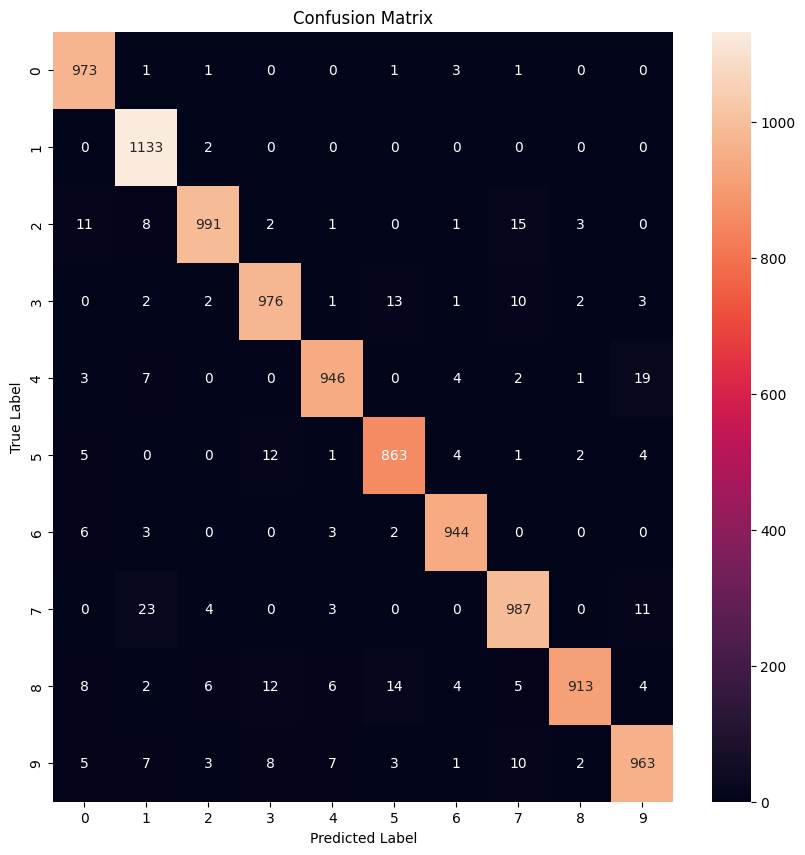

In [ ]:
X_train_noise, X_test_noise = add_noise(X_train, X_test, n5, n6)

fit_score(X_train_noise, X_test_noise, y_train)

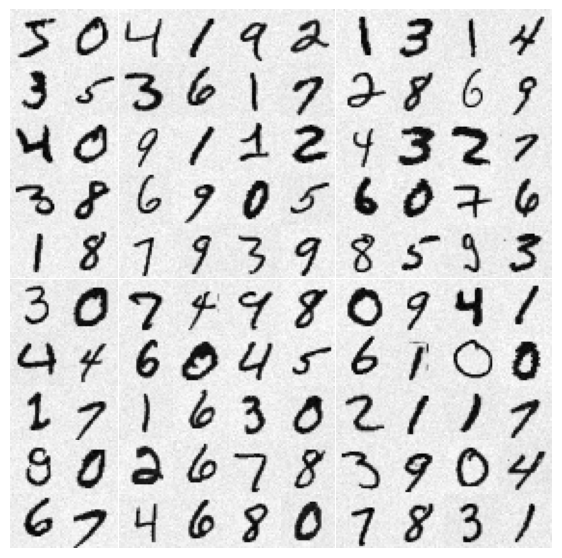

Macro Averaged Precision: 0.9689495357603253


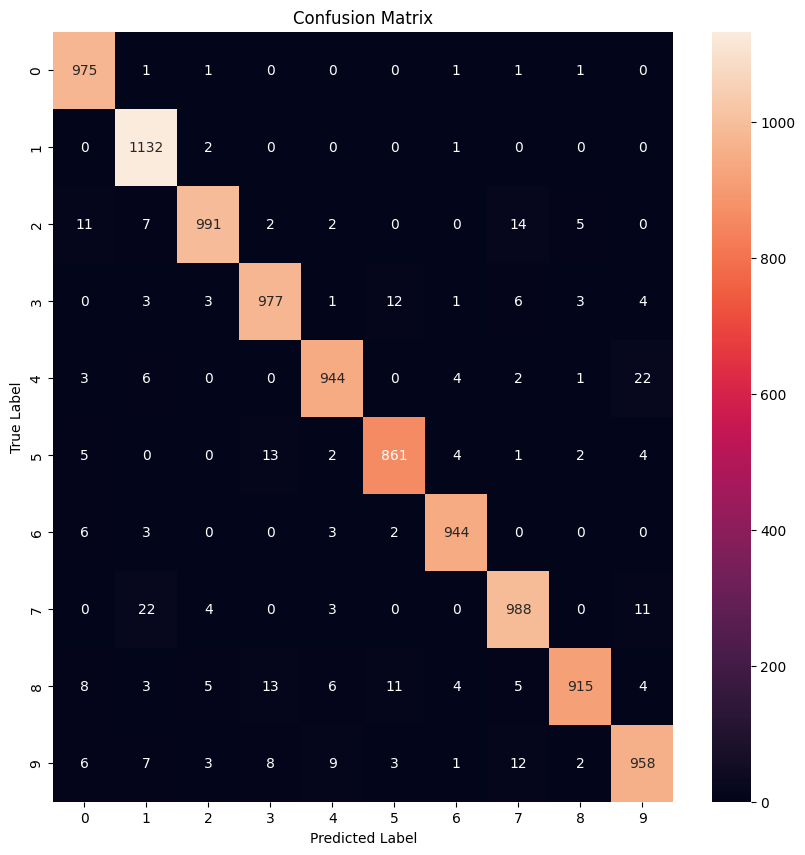

In [ ]:
X_train_noise, X_test_noise = add_noise(X_train, X_test, n7, n8)

fit_score(X_train_noise, X_test_noise, y_train)

### 4. Spam classifier

Exercise: _Build a spam classifier (a more challenging exercise):_

* _Download examples of spam and ham from [Apache SpamAssassin's public datasets](https://homl.info/spamassassin)._
* _Unzip the datasets and familiarize yourself with the data format._
* _Split the datasets into a training set and a test set._
* _Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, "Hello," "how," "are," "you," then the email "Hello you Hello Hello you" would be converted into a vector [1, 0, 0, 1] (meaning [“Hello" is present, "how" is absent, "are" is absent, "you" is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word._

_You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with "URL," replace all numbers with "NUMBER," or even perform _stemming_ (i.e., trim off word endings; there are Python libraries available to do this)._

_Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision._

We proceed at first as described in the book to fetch original dataset

In [ ]:
import tarfile
from pathlib import Path
import urllib.request

def fetch_spam_data():
    spam_root = "http://spamassassin.apache.org/old/publiccorpus/"
    ham_url = spam_root + "20030228_easy_ham.tar.bz2"
    spam_url = spam_root + "20030228_spam.tar.bz2"

    spam_path = Path() / "datasets" / "spam"
    spam_path.mkdir(parents=True, exist_ok=True)
    for dir_name, tar_name, url in (("easy_ham", "ham", ham_url),
                                    ("spam", "spam", spam_url)):
        if not (spam_path / dir_name).is_dir():
            path = (spam_path / tar_name).with_suffix(".tar.bz2")
            print("Downloading", path)
            urllib.request.urlretrieve(url, path)
            tar_bz2_file = tarfile.open(path)
            tar_bz2_file.extractall(path=spam_path)
            tar_bz2_file.close()
    return [spam_path / dir_name for dir_name in ("easy_ham", "spam")]

In [ ]:
ham_dir, spam_dir = fetch_spam_data()

Next, let's load all the emails:

In [ ]:
ham_filenames = [f for f in sorted(ham_dir.iterdir()) if len(f.name) > 20]
spam_filenames = [f for f in sorted(spam_dir.iterdir()) if len(f.name) > 20]

In [ ]:
len(ham_filenames)

2500

In [ ]:
len(spam_filenames)

500

In [ ]:
import email
import email.policy

def load_email(filepath):
    with open(filepath, "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [ ]:
ham_emails = [load_email(filepath) for filepath in ham_filenames]
spam_emails = [load_email(filepath) for filepath in spam_filenames]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X.shape, y.shape

((3000,), (3000,))

The original dataset size is 3000 emails. For this exercise, I will take out 30% of data points at random. This is implemented by selecting indices at random.

In [ ]:
import random

idxs = list(range(0, len(y)))
random.shuffle(idxs) # shuffle a list of indices

sample_idxs = idxs[:int(len(y)*0.7)]

In [ ]:
X_small, y_small = X[sample_idxs], y[sample_idxs] # 70% of training data

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small,
                                                    test_size=0.2, random_state=42)

X_small.shape, y_small.shape, X_train.shape, y_train.shape, y_train.sum()

((2100,), (2100,), (1680,), (1680,), 288)

In [ ]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [ ]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

### Email processing

In [ ]:
%pip install -q -U urlextract

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
import urlextract
import nltk

stemmer = nltk.PorterStemmer()
url_extractor = urlextract.URLExtract()

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True,
                 remove_punctuation=True, replace_urls=True,
                 replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)


class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1
                            for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)),
                          shape=(len(X), self.vocabulary_size + 1))

In [ ]:
from sklearn.pipeline import Pipeline
from collections import Counter

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

There is a minor decrease in performance, from 0.99 to 0.98. Also, it maximizes precision and trades recall off.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3)
score.mean() # original data 0.985

0.9827380952380952

In [ ]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print(f"Precision: {precision_score(y_test, y_pred):.2%}") # original 96.88
print(f"Recall: {recall_score(y_test, y_pred):.2%}") # original 97.89

Precision: 100.00%
Recall: 88.41%


For 50% of dataset...

In [ ]:
import random

idxs = list(range(0, len(y)))
random.shuffle(idxs) # shuffle a list of indices

sample_idxs = idxs[:int(len(y)*0.5)]

In [ ]:
X_small, y_small = X[sample_idxs], y[sample_idxs] # 50% of training data

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small,
                                                    test_size=0.2, random_state=42)

X_small.shape, y_small.shape, X_train.shape, y_train.shape, y_train.sum()

((1500,), (1500,), (1200,), (1200,), 207)

In [ ]:
preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)
log_clf = LogisticRegression(max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3)
score.mean()

0.9875000000000002

In [ ]:
X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print(f"Precision: {precision_score(y_test, y_pred):.2%}")
print(f"Recall: {recall_score(y_test, y_pred):.2%}")

Precision: 100.00%
Recall: 91.23%
